# Анализ результатов А/В-тестирования

_**Крупный интернет-магазин. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.**_

_**Даны 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
   Мы получили результаты A/B-теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.**_

       Краткий план действий:
1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    
2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    
3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    
4) Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
    
5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
    
6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    
7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    
8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    
9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    
10) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    
11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    
12) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
    
13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    
14) Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## 1 часть: приоритизация гипотез.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (13, 6)
import datetime as dt
import os
from pathlib import Path
pd.set_option('display.max_colwidth', 400)

In [2]:
ROOT_DIR = Path(os.path.abspath("__file__")).parent.parent

In [3]:
hypothesis = pd.read_csv(ROOT_DIR / 'datasets/hypothesis.csv')
orders = pd.read_csv(ROOT_DIR / 'datasets/orders.csv')
visitors = pd.read_csv(ROOT_DIR / 'datasets/visitors.csv')

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**В файле _/datasets/hypothesis.csv_ 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort**

### Предобработка данных

#### _hypothesis_

In [5]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Проверка типов:

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Проверка на дубликаты:

In [7]:
hypothesis.duplicated().sum()

0

#### _orders_

In [8]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Проверка типов:

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**В поле _date_ сменим тип с object на datetime:**

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Проверка на дубликаты:**

In [11]:
orders.duplicated().sum()

0

#### _visitors_

In [12]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Проверка типов:

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**В поле _date_ сменим тип с object на datetime:**

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Проверка на дубликаты:**

In [15]:
visitors.duplicated().sum()

0

**Проверка на принадлежность пользователя только к одной из групп:**

In [16]:
visitor_A = orders[orders['group']=='A'] 
visitor_B = orders[orders['group']=='B']
v = visitor_A.merge(visitor_B, left_on='visitorId', right_on='visitorId', how="inner", indicator=False) 

v

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


**Мы будем исключать 183 пользователя из таблиц для последующего корректного анализа**

In [17]:
orders = orders[orders['visitorId'].isin(v['visitorId'].to_list()) == False]
orders.reset_index(inplace=True)
orders

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


_**Данные получены и подготовлены к анализу**_

### Приоритизация гипотез


      Задачи:

    1) Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета.

    2) Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета.

    3) Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить, почему так произошло.

In [18]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [19]:
hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False)

,ICE,Hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [20]:
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


#### Можем наблюдать изменение в приоритетах по важности гипотез между ICE и RICE, так как во втором случае учтен показатель Reach - "скольких пользователей затронет изменение, которое вносится". _Предлагаю к рассмотрению гипотезу под номером 7_

## 2 часть: анализ A/B-теста

### строим график кумулятивной выручки по группам и делаем выводы/предположения.

Средняя выручка за день в каждой группе:

In [21]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A     92365.0
B    107340.0
Name: revenue, dtype: float64

Для последующего объединения мы должны сравнить данные в таблицах visitors и orders:

In [22]:
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [23]:
collate = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
collate

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


Создаём **cumulativeData** - таблицу кумулятивных данных по двум таблицам:

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


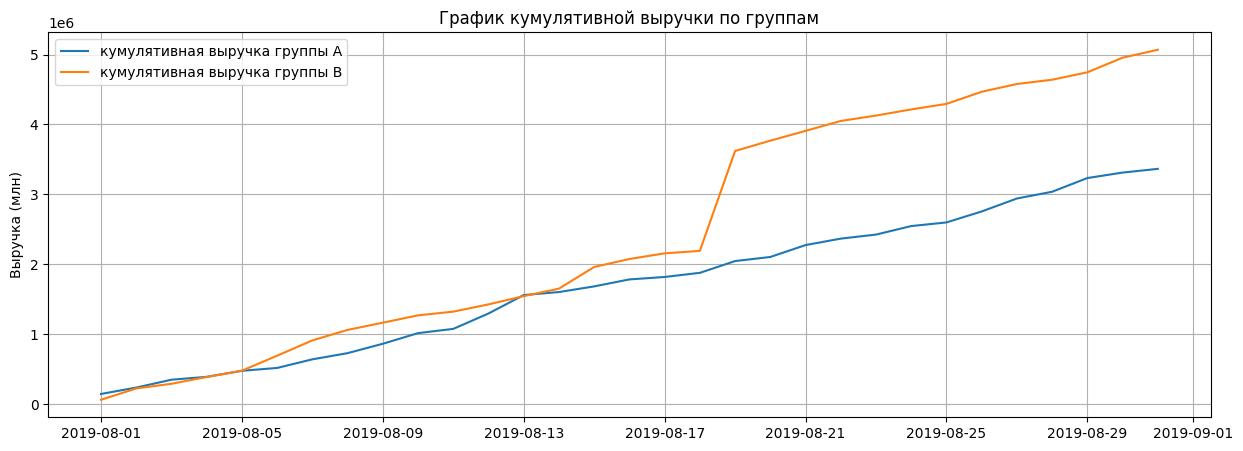

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='кумулятивная выручка группы А')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='кумулятивная выручка группы В')
plt.ylabel('Выручка (млн)')
plt.title('График кумулятивной выручки по группам')
plt.grid()
plt.legend()
plt.show()

**Кумулятивная выручка группы B до 18 августа была чуть выше кумулятивной выручки группы A, а далее только подтвердила свою преуспевающую позицию.**

### строим график кумулятивного среднего чека  по группам и делаем выводы/предположения.

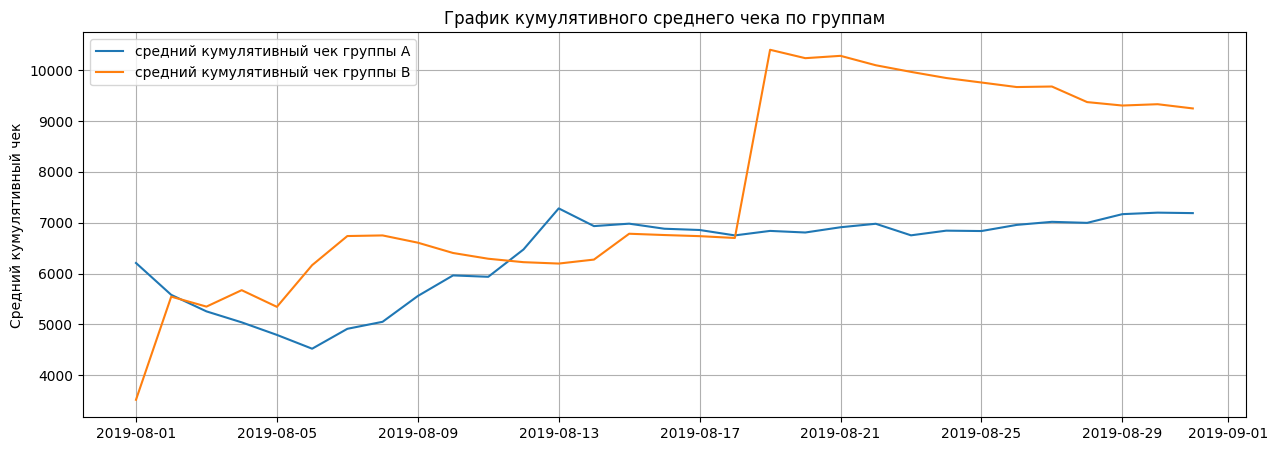

In [26]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы А')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы В')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний кумулятивный чек')
plt.grid()
plt.legend()
plt.show()

**Наблюдается повторение графика кумулятивной выручки: с 18 августа средний кумулятивный чек группы В значительно выше среднего кумулятивного чека группы А.**

### строим график относительного изменения кумулятивного среднего чека группы В к группе А и делаем выводы/предположения.

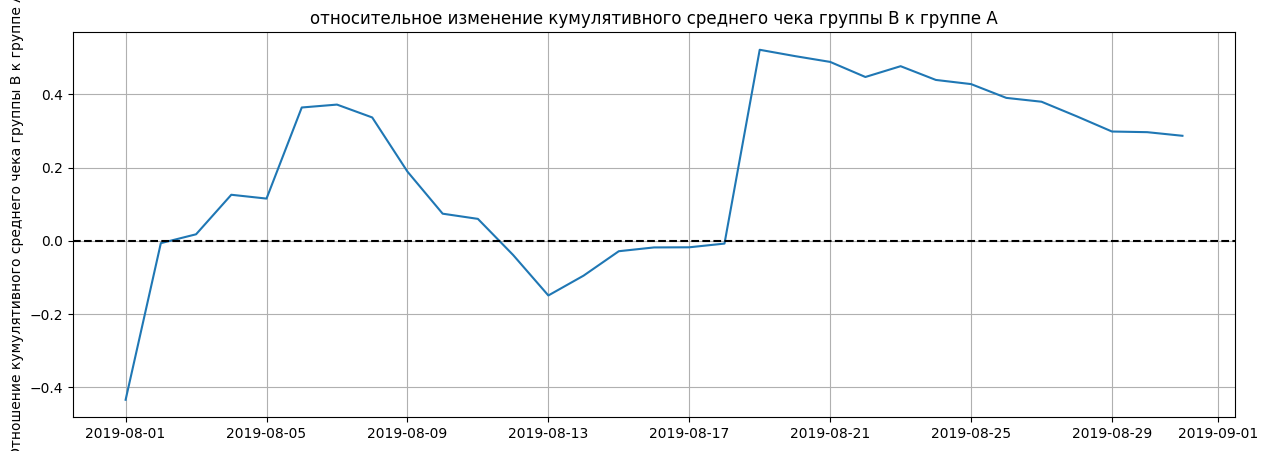

In [27]:
data = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(data['date'], (data['revenueB']/data['ordersB']) / (data['revenueA']/data['ordersA'])-1)
plt.title('относительное изменение кумулятивного среднего чека группы В к группе А')
plt.ylabel('Отношение кумулятивного среднего чека группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

**Вновь убеждаемся, что со второго августа кумулятивный средний чек группы В выше кумулятивного среднего чека группы  А. В примерный период с 12.08 по 15.08 показатель был ниже относительно среднего чека группы  А, но далее значительно вырос.**

### строим график кумулятивного среднего количества заказов на посетителя по группам и делаем выводы/предположения.

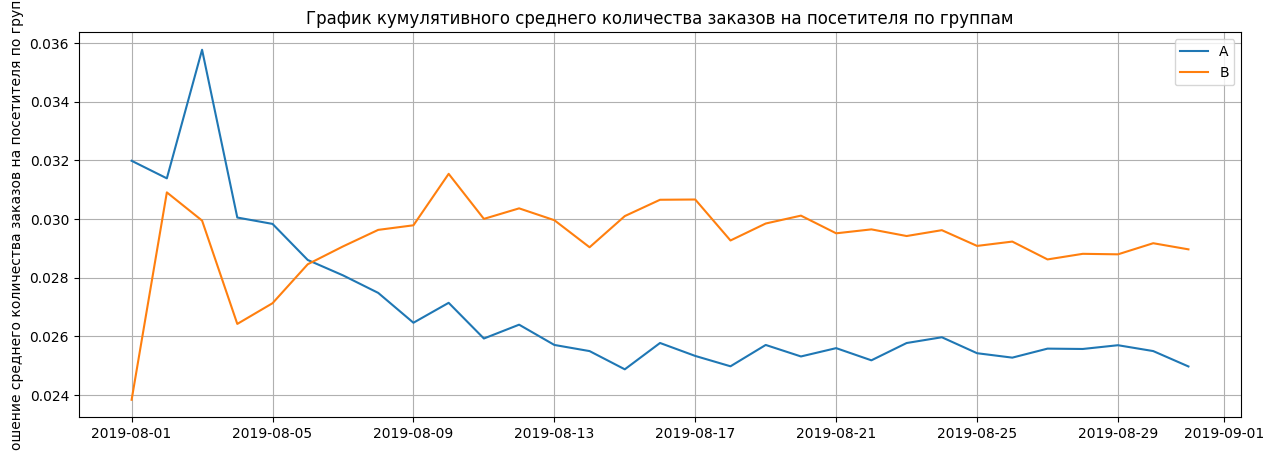

In [28]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Отношение среднего количества заказов на посетителя по группам')
plt.legend()
plt.grid()
plt.show()

**В начале видим, что показатель количества заказов к количеству посетителей был лучше у группы А. Достигнув своего пика 02.08 этот показатель группы А резко упал, а у группы В стремительно рос с 04.08. В целом, конверсия у группы В стабильно лучше по показателям сравниваемых с показателями группы А.**

### строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А и делаем выводы/предположения.

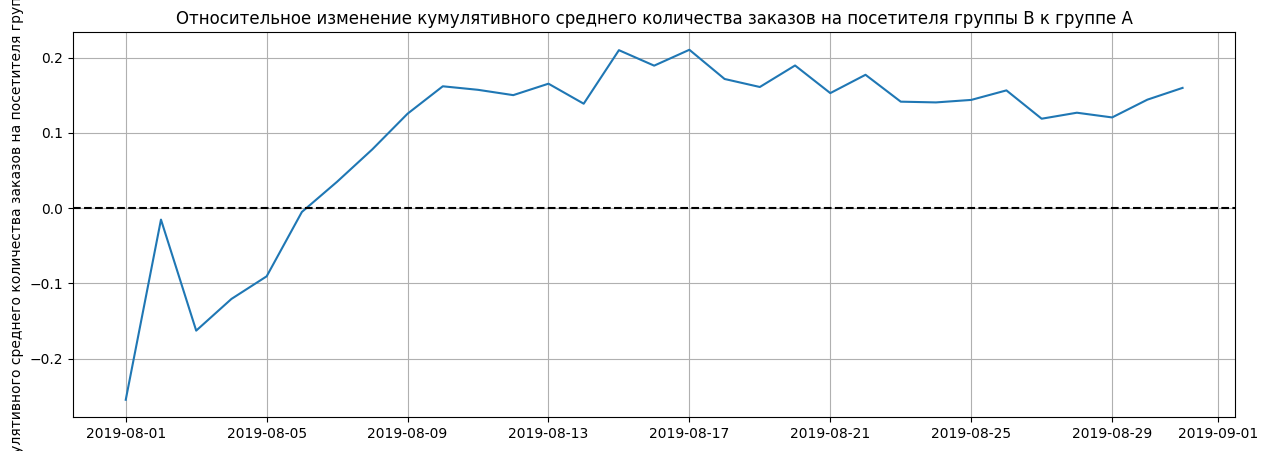

In [29]:
CumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(CumulativeConversions['date'], CumulativeConversions['conversionB']/CumulativeConversions['conversionA']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.ylabel('Отношение кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

**До 5.08  конверсия группы В была несколько ниже конверсия группы А, кроме данных от 02.08 - здесь мы видим всплеск показателей. Уже с 5 августа группа В лидировала до конца периода и "устаканилась" 21.08.**

### строим точечный график количества заказов по пользователям и делаем выводы/предположения.

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


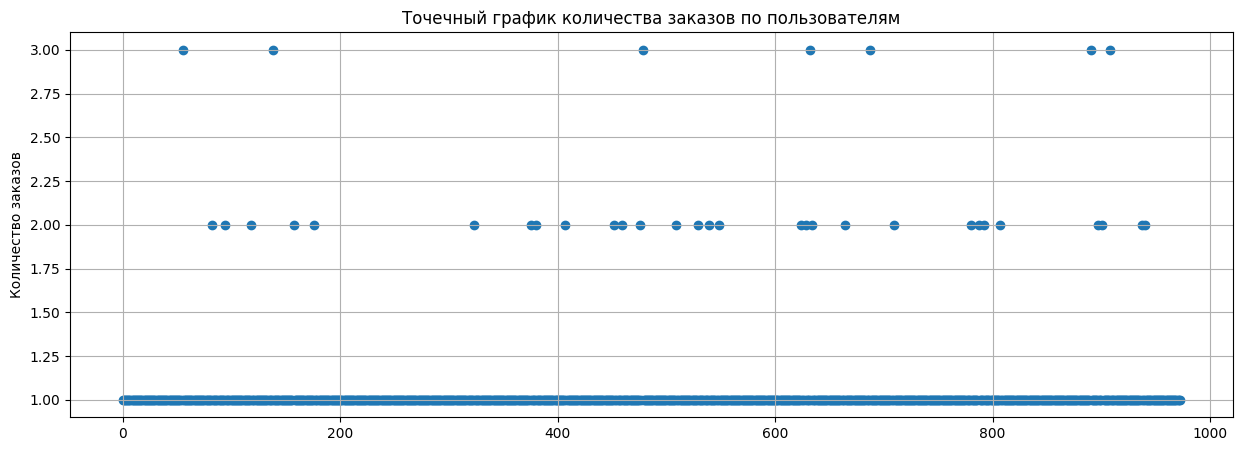

In [30]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['user_id','orders']
display(ordersByUsers.sort_values(by='orders',ascending=False).head(10))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']);
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

**Конечно, больше всего пользователей, сделавших 1 заказ. Тех, кто совершил 2 - достаточно. Совершивших 3 заказа - значительно меньше. Далее будем высчитывать перцентели.**

### считаем 95-й и 99-й перцентили количества заказов на пользователя и выбераем границу для определения аномальных пользователей.

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Покрепляем выше увиденный вывод на точечном графике о том, что большинство пользователей делают 1-2 заказа. Всё, что выше, будем считать аномалией.**

### строим точечный график стоимостей заказов и делаем выводы/предположения.

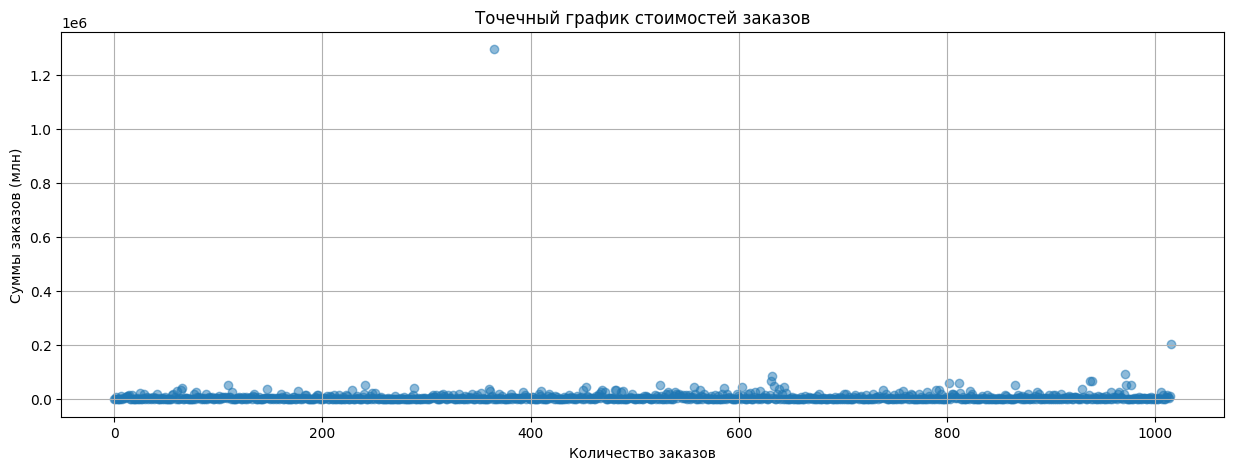

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Суммы заказов (млн)')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.grid()
plt.show()

In [33]:
orders.query('revenue > 190000')

,index,transactionId,visitorId,date,revenue,group
365,425,590470918,1920142716,2019-08-19,1294500,B
1015,1196,3936777065,2108080724,2019-08-15,202740,B


**Не станем учитывать найденные выбросы:**

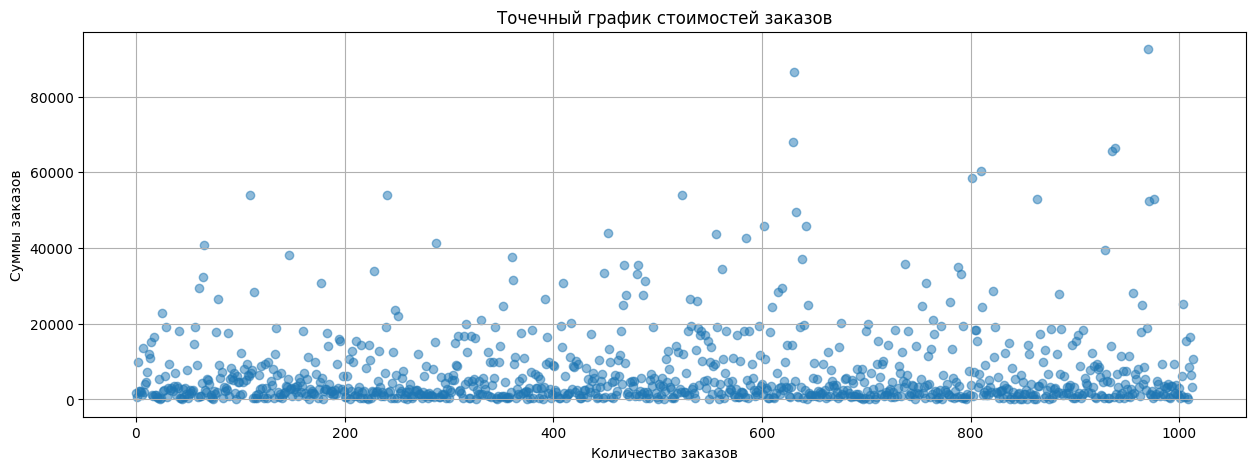

In [34]:
abnorma_orders = orders[orders['revenue']<190000]['revenue']
x_values = pd.Series(range(0,len(abnorma_orders)))
plt.figure(figsize=(15,5))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Суммы заказов')
plt.scatter(x_values, abnorma_orders, alpha=0.5)
plt.grid()
plt.show()

Видим, что чаще стоимость заказа составляет до 60'000, считаем перцентели:

### считаем 95-й и 99-й перцентили стоимости заказов и выбераем границу для определения аномальных пользователей.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Большинство заказов стоили до 26'785, границей для аномалий установим показатель в _53'904._**

### считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным и делаем выводы/предположения.

_**Если Н0 - статистически значимых различий в средних чеках между группами А и В нет, то Н1 - статистически значимые различия есть.**_

In [36]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date' : 'max',  'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data_merge = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left').merge(ordersACummulative, left_on='date', right_on='date', how='left').merge(ordersBCummulative, left_on='date', right_on='date', how='left').merge(visitorsADaily, left_on='date', right_on='date', how='left').merge(visitorsBDaily, left_on='date', right_on='date', how='left').merge(visitorsACummulative, left_on='date', right_on='date', how='left').merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data_merge['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_merge['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель В и А = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный показатель В и А = 0.160


_**p-value = 0.011, что меньше 0.05, то есть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергать. А значит по «сырым» данным различия в конверсих групп A и B есть - преобладание группы В составляет 16%.**_

### считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным и делаем выводы/предположения.

_**Если Н0 - статистически значимых различий в средних чеках между группами нет, то Н1 - статистически значимые различия есть.**_

In [41]:
display("alpha = 0.05")
display("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
display("Относительный показатель В и А = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'alpha = 0.05'

'p-value = 0.829'

'Относительный показатель В и А = 0.287'

_**p-value приближен к 83%, что на порядок выше 0.05, то есть причин отвергать нулевую гипотезу нет.**_

**Наблюдаемое различие в 28.7% среднего чека группы В значительно выше среднего чека группы А не является статистически значимым, так как теcт показал, что нет стат. значимой разницы между группами - каково бы различие чека не было, оно не будет являться стат. значимым.**

### считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным и делаем выводы/предположения.

In [42]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
print('Количество аномальных пользователей = ',len(abnormalUsers)) 

937    148427295
33     249864742
58     611059232
811    887908475
632    888512513
dtype: int64

Количество аномальных пользователей =  16


In [43]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data_merge['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data_merge['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный показатель В к А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.007
Относительный показатель В к А = 0.189


**p-value = 0.007, меньше 0.05, значит, отвергаем нулевую гипотезу (статистически значимых различий в конверсии между группами нет) и по «очищенным» данным различия в конверсии групп A и B есть -  преобладание группы В составляет 18,9%.**

### считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным и делаем выводы/предположения.

In [44]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print('Относительный показатель В к А = {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.788
Относительный показатель В к А = -0.032


**p-value = 0.8, значительно больше 0.05, значит, нулевую гипотезу (в среднем чеке различия есть) отвергать нельзя.**

**По очищенным данным средний чек группы В на 2% ниже среднего чека группы A - это различие не стат. значимо.**


## Принимаем решение по результатам теста.

_**Результаты тестирования:**_

И "сырые“, и "очищенные“ данные говорят о наличии различий в конверсиях групп А и В. Относительное преобладание группы В над группой А равно 18,9% по "очищенным" и 16% по "сырым" данным.

И по "сырым“, и по "очищенным" данным различия в средних чеках групп A и B не наблюдаются, несмотря на то, что средний чек группы B оказался на 2% ниже среднего чека группы A по "очищенным" данным, в то же время по "сырым" данным, он был больше на 26%. Это связано с двумя заказами, которые мы приняли далее за аномалии: revenue на 202’740 и на 1’294’500 в orders.

После игнорирования аномальных данных, чеки стали схожи.

_**В итоге можно принять решение об остановке тестирования: группа В значительно лучше по конверсии группы A , хотя по среднему чеку группы схожи.**_